前面 4 章主要介绍了，关于总体均值和总体比比率的统计推断方法 本章讨论关于总体方差的统计推断

# 一个总体方差的统计推断

样本方差：
$$s^2 = \frac {\sum(x_i - \bar x)^2}{n-1}$$

是总体方差 $\sigma$ 的点估计。

从正态分布中任意抽取一个容量为 $n$ 的简单随机样本，则 $\displaystyle \frac{(n-1)s^2}{\sigma^2}$ 的抽样分布服从自由度为 $n-1$ 的 $\chi^2$ 分布。

$\chi^2$ 分布与我们之前学习的分布都是不一样的，$\chi^2$ 分布描述的是**方差**的分布。

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2, ttest_ind, ttest_rel
import matplotlib.colors as clrs
import pandas as pd
from matplotlib import pyplot

from pathlib import Path
#设置数据文件夹路径
DATA = Path().resolve()  / 'data'

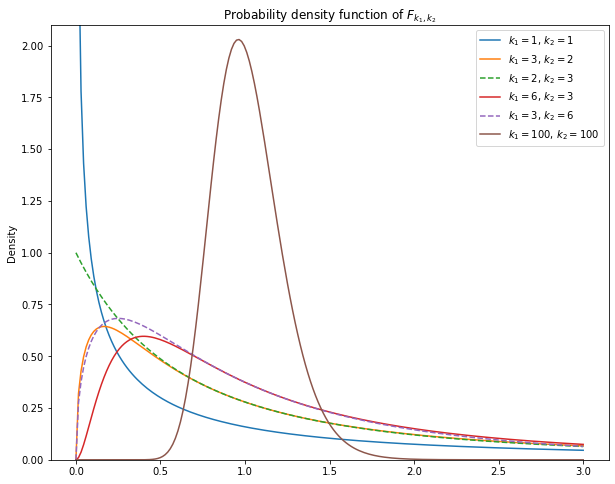

In [3]:
from scipy.stats import f
# Calculate the probability density function for values of x in [0;3]
x = np.linspace(start = 1e-10, stop = 3, num = 200)
#
_ = plt.figure(num = 3, figsize = (10, 8))
#
_ = plt.plot(x, f.pdf(x, dfn = 1, dfd = 1), label = "$k_1 = 1$, $k_2 = 1$")
_ = plt.plot(x, f.pdf(x, dfn = 3, dfd = 2), label = "$k_1 = 3$, $k_2 = 2$")
_ = plt.plot(x, f.pdf(x, dfn = 2, dfd = 3), 
         linestyle = "--", label = "$k_1 = 2$, $k_2 = 3$")
_ = plt.plot(x, f.pdf(x, dfn = 6, dfd = 3), label = "$k_1 = 6$, $k_2 = 3$")
_ = plt.plot(x, f.pdf(x, dfn = 3, dfd = 6), 
         linestyle = "--", label = "$k_1 = 3$, $k_2 = 6$")
_ = plt.plot(x, f.pdf(x, dfn = 100, dfd = 100), label = "$k_1 = 100$, $k_2 = 100$")
#
_ = plt.ylim((0, 2.1))    
_ = plt.title("Probability density function of $F_{k_1, k_2}$")
_ = plt.ylabel("Density")
#
_ = plt.legend()
plt.show()

## 区间估计：$\chi^2$ 分布表

### 总体方差的区间估计

$$\frac{(n-1)s^2}{\chi_{\alpha/2}^2} \le \sigma^2 \le \frac{(n-1)s^2}{\chi_{(1-\alpha/2)}^2}$$

其中
- 统计检验量 $\chi^2$ 值是基于自由度为 $n-1$ 的 $\chi^2$ 分布
- $1-\alpha$ 为置信系数

接下来我们结合一个例子来理解，如何在实际情况中运用 $\chi^2$ 分布来进行推断统计。假设我们已知:

- 样本容量 $n = 20$
- 样本方差 $\sigma^2 = 0.0025$
- 自由度 $df = n - 1 = 19$
- 显著性水平 $\alpha = 0.05$
- 自由度为 19 时的 $\chi_{0.025}^2 = 32.852$，$\chi_{0.975}^2 = 8.907$

则我们可以估计总体方差的区间为：

$$\frac{(n-1)s^2}{\chi_{\alpha/2}^2} \le \sigma^2 \le \frac{(n-1)s^2}{\chi_{(1-\alpha/2)}^2}$$

$$\frac{19 \times 0.0025}{32.852} \le \sigma^2 \le \frac{19 \times 0.0025}{8.907}$$

$$0.0014 \le \sigma^2 \le 0.0053$$

$$0.038 \le \sigma \le 0.073$$

### 总体方差假设检验的检验统计量


下面我们用一个例子来看一下，实际情况中如何使用 $\chi^2$ 分布，通过样本估计总体方差的区间

假设我们收集了 24 个车次公交车的等候时间，现在我们想知道，所有的公交车等候时间的**方差**是否大于 4。

- $H_0: \sigma^2 \le 4$
- $H_{\alpha}: \sigma^2 > 4$

$$\chi^2 = \frac{(n-1)s^2}{\sigma_{0}^2}$$

接下来我们看一个例子：
- $H_0: \sigma^2 \le 4$
- $H_\alpha: \sigma^2 > 4$
- 样本数  $n = 24$
- 样本均值 $\mu = 4$
- 样本方差  $s^2 = 4.9$

$$\chi^2 = \frac{(n-1)s^2}{\sigma_{0}^2} = \frac{(24 - 1) \times 4.9}{4} = 28.18$$

查阅 $\chi^2$ 分布表可得，自由度为 23 概率为 0.1 时的 $\chi^2$ 值为 32.007。

因为 $\chi^2 = 28.18 < 32.007$ ，所以 $p > 0.1 > \alpha = 0.05$，因此我们不能拒绝零假设。


In [182]:
p = chi2.cdf(32.007, df = n-1)
p

array([0.90000208])

In [183]:
chisqrt = chi2.ppf(p, df = n-1)
chisqrt

array([32.007])

In [184]:
busTimes = pd.read_csv(DATA / 'BusTimes.csv')
data = busTimes.dropna()

In [185]:
alpha = 0.05
sigma = 4

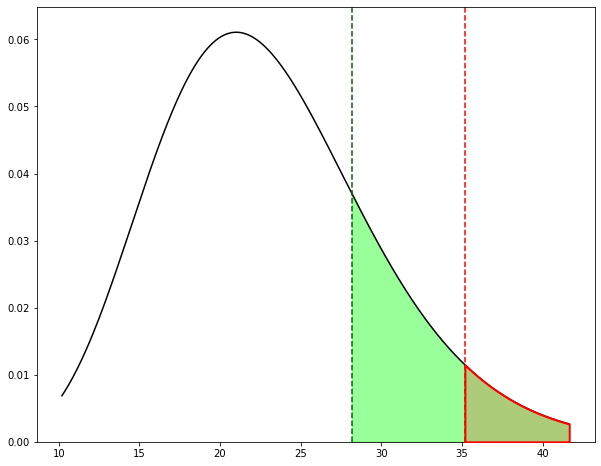

In [186]:
n = data.count()
variance = data.var()

x = np.linspace(start = chi2.ppf(0.01, df = n-1), stop = chi2.ppf(0.99, df = n-1), num = int(1e5))

chi_crit = chi2.ppf(1-alpha, df = n-1)
p_val = chi2.cdf((n-1)*variance/sigma, df = n-1)
chi_stat = chi2.ppf(p_val, df = n-1)

hx = chi2.pdf(x, df = n-1)

# Plot the density
fig, ax = plt.subplots(num = 1, figsize = (10, 8))
_ = plt.plot(x, hx, color = "black")
_ = plt.margins(y = 0)
_ = plt.ylim((0, chi2.pdf(x, df = n-1).max() * 1.0618))

# Shade the probability alpha
_ = plt.fill_between(x[x >= chi_crit], hx[x >= chi_crit], 
                 edgecolor = "red", linestyle = "-", linewidth = 2,
                 facecolor = clrs.to_rgba(c = (1, 0, 0, 0.2)), zorder = 10)

# plot the critical value p_c:
_ = plt.axvline(x = chi_crit, color = "red", linestyle = "--")

# Shade the probability p-value
_ = plt.fill_between(x[x >= chi_stat], hx[x >= chi_stat], edgecolor = None,
                 color = clrs.to_rgba(c = (0, 1, 0, 0.4)))

# plot the observed t-statictic:
_ = plt.axvline(x = chi_stat, color = "darkgreen", linestyle = "--")

plt.show()

接下来我们再看一个例子：
- $H_0: \sigma^2 = 100$
- $H_\alpha: \sigma^2 \ne 100$
- 样本数  $n = 30$
- 样本方差  $s^2 = 162$

$$\chi^2 = \frac{(n-1)s^2}{\sigma_{0}^2} = \frac{(30 - 1) \times 162}{100} = 46.98$$

查阅 $\chi^2$ 分布表可得，自由度为 29 时：
- 概率为 0.025 的 $\chi^2$ 值为 45.722
- 概率为 0.01 的 $\chi^2$ 值为 49.588

因为我们这里进行的是双尾检验，而 $\chi^2$ 分布表的概率是单尾的值，换算一下可得，自由度为 29 时：
- 双尾概率为 0.05 的 $\chi^2$ 值为 45.722
- 双尾概率为 0.02 的 $\chi^2$ 值为 49.588

检验统计量 $\chi^2 = 46.98$，可得 $p$ 位于区间 $[0.02. 0.05]$，此时 $p < \alpha = 0.05$，我们可以拒绝零假设。

In [210]:
alpha = 0.05
sigma = 100
n = 30
variance = 162

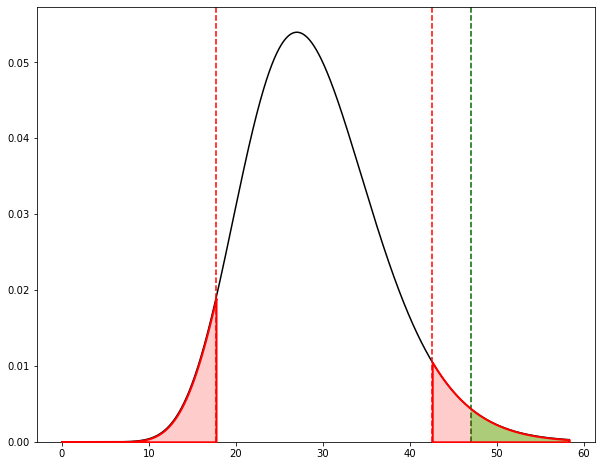

In [211]:
x = np.linspace(start = 0, stop = chi2.ppf(0.999, df = n-1), num = int(1e5))

chi_right_crit = chi2.ppf(1-alpha, df = n-1)
chi_left_crit = chi2.ppf(alpha, df = n-1)
p_val = chi2.cdf((n-1)*variance/sigma, df = n-1)
chi_stat = chi2.ppf(p_val, df = n-1)

hx = chi2.pdf(x, df = n-1)

# Plot the density
fig, ax = plt.subplots(num = 1, figsize = (10, 8))
_ = plt.plot(x, hx, color = "black")
_ = plt.margins(y = 0)
_ = plt.ylim((0, chi2.pdf(x, df = n-1).max() * 1.0618))

# Shade the probability alpha
_ = plt.fill_between(x[x >= chi_right_crit], hx[x >= chi_right_crit], 
                 edgecolor = "red", linestyle = "-", linewidth = 2,
                 facecolor = clrs.to_rgba(c = (1, 0, 0, 0.2)), zorder = 10)
_ = plt.fill_between(x[x <= chi_left_crit], hx[x <= chi_left_crit], 
                 edgecolor = "red", linestyle = "-", linewidth = 2,
                 facecolor = clrs.to_rgba(c = (1, 0, 0, 0.2)), zorder = 10)

# plot the critical value p_c:
_ = plt.axvline(x = chi_right_crit, color = "red", linestyle = "--")
_ = plt.axvline(x = chi_left_crit, color = "red", linestyle = "--")

# Shade the probability p-value
_ = plt.fill_between(x[x >= chi_stat], hx[x >= chi_stat], edgecolor = None,
                 color = clrs.to_rgba(c = (0, 1, 0, 0.4)))

# plot the observed t-statictic:
_ = plt.axvline(x = chi_stat, color = "darkgreen", linestyle = "--")

plt.show()

# $F$ 分布：两个总体方差的统计推断

因为正态分布的一个前提就是方差齐性，因此在使用参数检验的推断统计方法之前，都需要进行 $F$ 检验。

当 $\sigma_1^2 = \sigma_2^2$ 时，$s_1^2/s_2^2$ 的抽样分布

当两个方差相等的正态总体中分别抽取容量为$n_1$和$n_2$的两个独立的简单随机样本则：

$$\frac{s_1^2}{s_2^2}$$

的抽样分布服从份子自由度为 $n_1-1$ 和分母自由度 $n_2-1$ 的 $F$ 分布。
- $s_1^2$ 为取自总体1的容量为 $n_1$ 的随机样本的样本方差
- $s_2^2$ 为取自总体2的容量为 $n_2$ 的随机样本的样本方差

总体方差$\sigma_1^2 = \sigma_2^2$的假设检验的检验统计量

$$F = \frac{s_1^2}{s_2^2}$$

将样本方差较大的总体记为总体1，则检验统计量服从份子自由度为 $n_1-1$，分母自由度为 $n_2-1$ 的 $F$ 分布。

下面我们看一个例子：
- $H_0: \sigma_1^2 = \sigma_2^2$
- $H_\alpha: \sigma_1^2 \ne \sigma_2^2$
- $n_1 = 26$
- $n_2 = 16$
- $s_1^2 = 48$
- $s_2^2 = 20$

$$F = \frac{s_1^2}{s_2^2} = \frac{48}{20} = 2.4$$

查阅 $F$ 分布表可得，$df_1 = 25, df_2 = 15$ 时：
- 概率为 0.05 的 $\chi^2$ 值为 2.28
- 概率为 0.025 的 $\chi^2$ 值为 2.69

因为我们这里进行的是双尾检验，而 $F$ 分布表的概率是单尾的值，换算一下可得，$df_1 = 25, df_2 = 15$ 时：
- 双尾概率为 0.1 的 $\chi^2$ 值为 2.28
- 双尾概率为 0.05 的 $\chi^2$ 值为 2.69

由于此时 $F = 2.4$ 位于区间 $[2.28, 2.69]$ 之间
- 如果设置 $\alpha = 0.1$，此时 $p < \alpha = 0.1$，所以我们拒绝零假设
- 如果设置 $\alpha = 0.05$，此时 $p > \alpha = 0.05$，所以我们无法拒绝零假设

我们可以看一下，实际情况中，如何使用 $F$ 分布

In [5]:
schoolBus = pd.read_csv(DATA / 'SchoolBus.csv')
data1 = schoolBus['Milbank'].dropna()
data2 = schoolBus['Gulf Park'].dropna()

In [6]:
import scipy.stats
#define F-test function
def f_test(x, y):
    x = np.array(x)
    y = np.array(y)
    f = np.var(x, ddof=1)/np.var(y, ddof=1) #calculate F test statistic 
    dfn = x.size-1 #define degrees of freedom numerator 
    dfd = y.size-1 #define degrees of freedom denominator 
    p = - scipy.stats.f.cdf(f, dfn, dfd) + 1 #find p-value of F test statistic 
    return f, p

In [7]:
#perform F-test
fvalue, pvalue = f_test(data1, data2)
print('The F-score for data is {:.3f}, corresonding p-value is {:.2f}%'.format(fvalue, pvalue*100))

The F-score for data is 2.401, corresonding p-value is 4.05%
